# Cis effects enrichment - Enrichr

This notebook will use Enrichr to look for pathways enriched for proteins that came up across multiple cancers in the cis effects analysis.

## Setup

In [1]:
import pandas as pd
import numpy as np
import gprofiler
import cptac.utils as ut
import gseapy as gp
import os
import IPython.display

In [2]:
def run_enrichr(input_file, cancer_type=None):

    input_df = pd.read_csv(input_file, sep="\t")
    
    if cancer_type is not None:
        cancer_df = input_df[input_df["cancers"].str.contains(cancer_type)]
        protein_list = cancer_df["protein"].tolist()
    else:
        protein_list = input_df["protein"].tolist()

    enr = gp.enrichr(
        gene_list=protein_list,
        gene_sets=os.path.join("gene_set_libraries", "ReactomePathways.gmt"),
        background="hsapiens_gene_ensembl",
        organism='Human',
        description='test_name',
        outdir=None,
        cutoff=0.05
    )
    
    return enr.res2d.sort_values(by="Adjusted P-value")

## 7p trans effects

In [3]:
file_7p_trans = "pancancer_summary_7p_trans.tsv"
luad_7p_trans_results = run_enrichr(file_7p_trans, cancer_type="luad")
luad_7p_trans_results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Genes
668,CUSTOM140131507786608,Terminal pathway of complement (R-HSA-166665),5/8,2.522054e-08,0.000019,C8G;C9;C8A;C5;C6
303,CUSTOM140131507786608,Immune System (R-HSA-168256),60/2225,1.725906e-07,0.000064,IRF8;PGRMC1;TLN1;GBP5;KCNAB2;MGRN1;MAP3K3;PLCG...
310,CUSTOM140131507786608,Innate Immune System (R-HSA-168249),36/1141,2.561535e-06,0.000632,PGRMC1;KCNAB2;PLCG2;GMFG;FGL2;C6;MUC1;PRCP;C8G...
587,CUSTOM140131507786608,Signaling by Erythropoietin (R-HSA-9006335),5/25,1.976788e-05,0.003657,STAT5B;PLCG2;STAT5A;PIK3CD;CRKL
119,CUSTOM140131507786608,Complement cascade (R-HSA-166658),9/138,1.225523e-04,0.018138,CFH;FCN3;C8G;C9;CFHR5;C8A;C5;CFHR2;C6
342,CUSTOM140131507786608,Intrinsic Pathway of Fibrin Clot Formation (R-...,4/23,2.487920e-04,0.030684,PRCP;PROC;F9;F11
332,CUSTOM140131507786608,"Interleukin-3, Interleukin-5 and GM-CSF signal...",5/44,3.267726e-04,0.034079,INPP5D;STAT5B;STAT5A;PIK3CD;CRKL
522,CUSTOM140131507786608,Regulation of Complement cascade (R-HSA-977606),8/127,3.684209e-04,0.034079,CFH;C8G;C9;CFHR5;C8A;C5;CFHR2;C6
185,CUSTOM140131507786608,Downstream signal transduction (R-HSA-186763),4/29,6.255950e-04,0.051438,CRKL;RASA1;STAT5B;STAT5A
635,CUSTOM140131507786608,Synthesis of PIPs at the plasma membrane (R-HS...,5/53,7.811967e-04,0.052553,OCRL;INPP5D;RUFY1;PLEKHA2;PIK3CD


## Make diagrams

In [4]:
def make_reactome_diagram(idx):
    
    output_dir = "images"
    if not os.path.isdir(output_dir):
        os.mkdir(output_dir)

    prot = pd.read_csv(file_7p_trans, sep="\t")
    luad_prot = prot[prot["cancers"].str.contains("luad")][["protein", "mean_simp_change"]].\
    set_index("protein")

    pathway_id = luad_7p_trans_results["Term"].iloc[idx].split("(")[1][:-1]

    mean_change, img_path = ut.reactome_pathway_overlay(
        pathway=pathway_id,
        df=luad_prot,
        open_browser=False,
        export_path=os.path.join("images", f"luad_7p_trans_{pathway_id}.png"),
        quality=5
    )

    return img_path

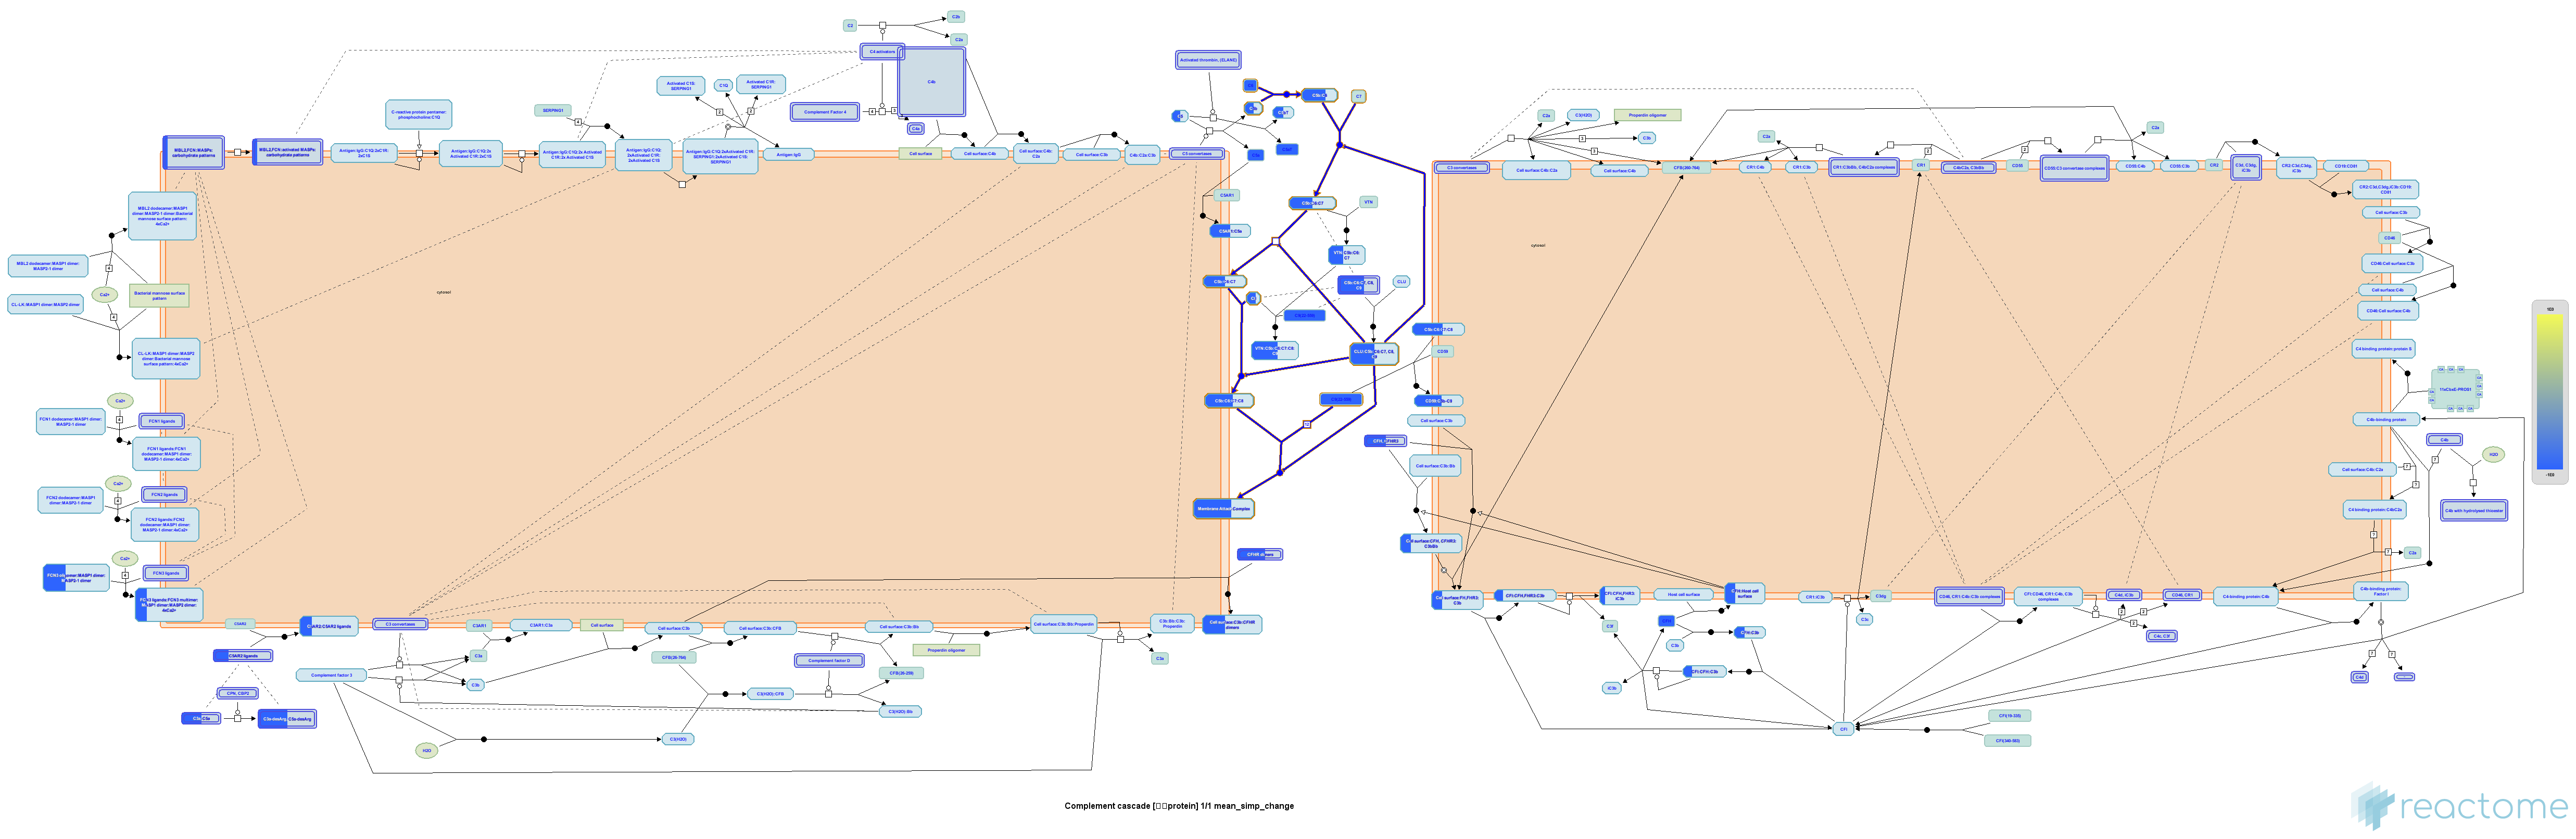

In [5]:
IPython.display.Image(make_reactome_diagram(0))

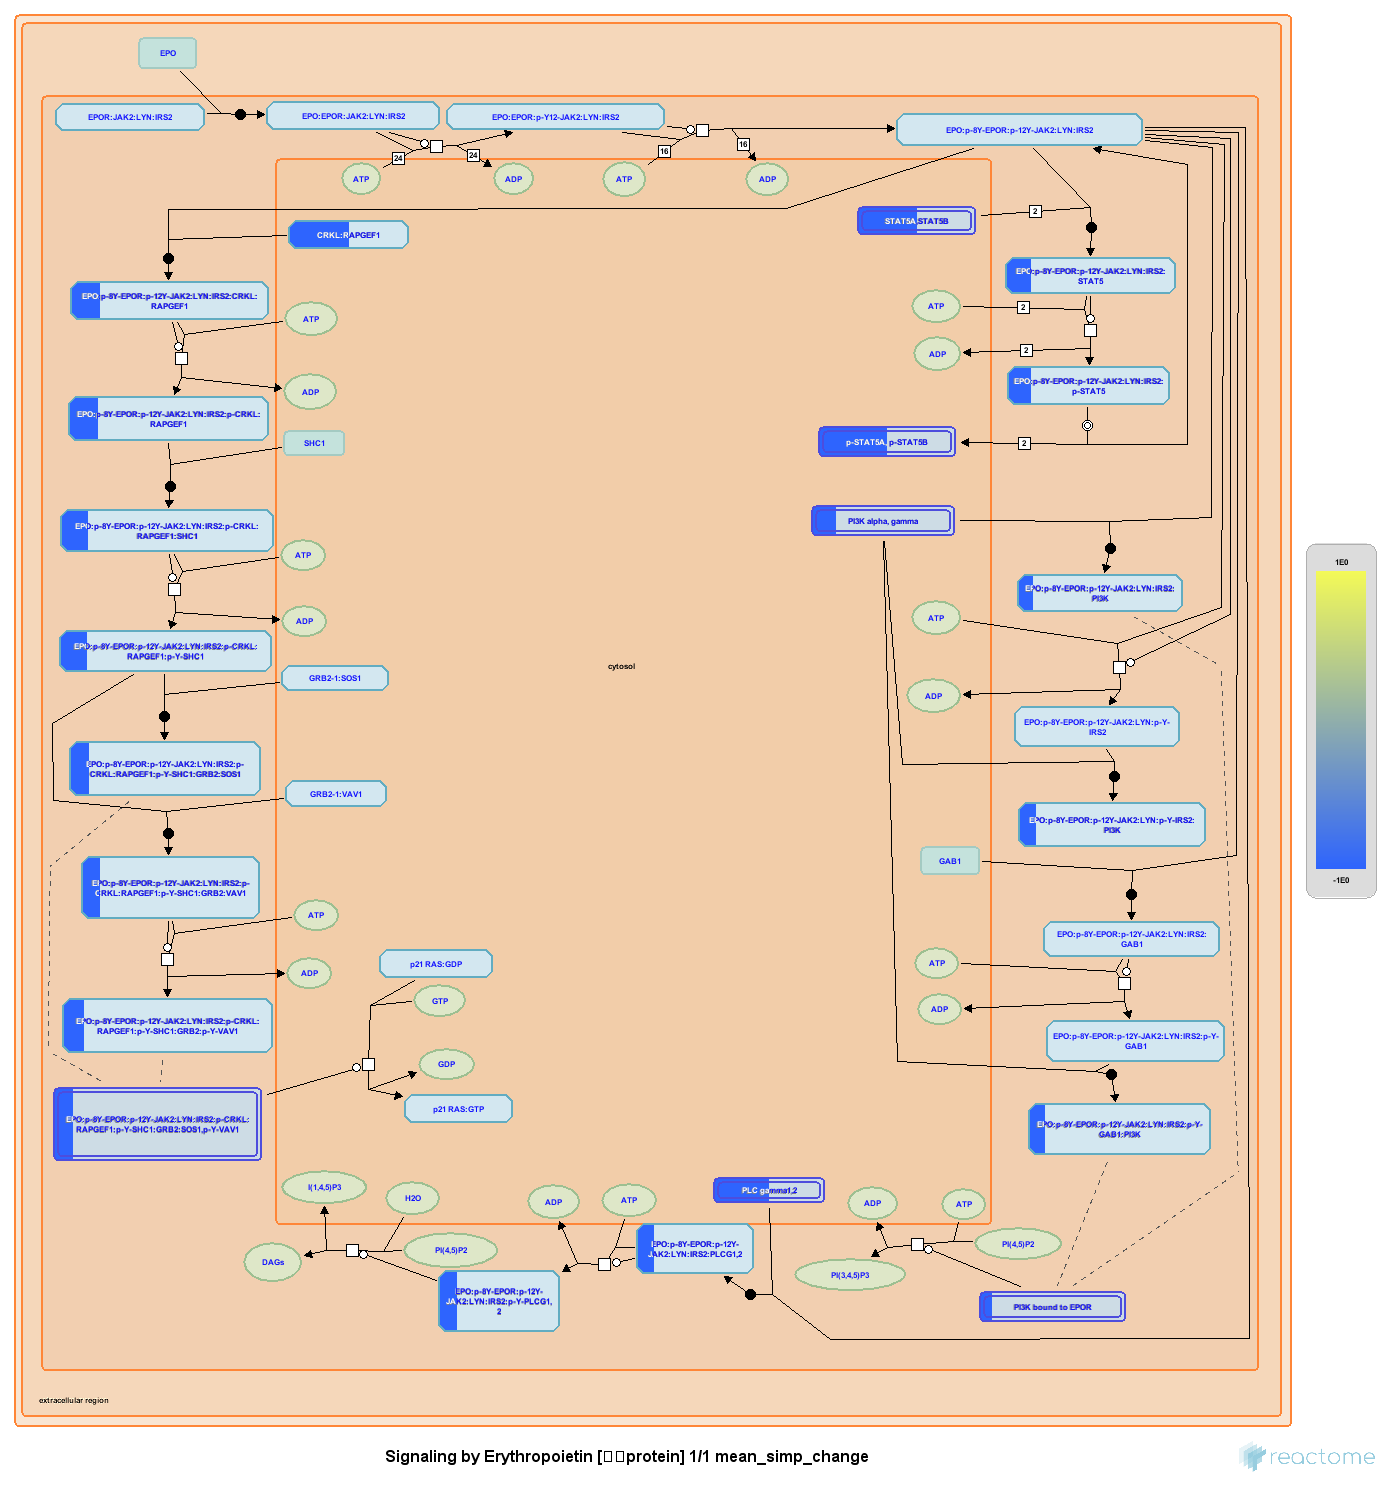

In [6]:
IPython.display.Image(make_reactome_diagram(3))

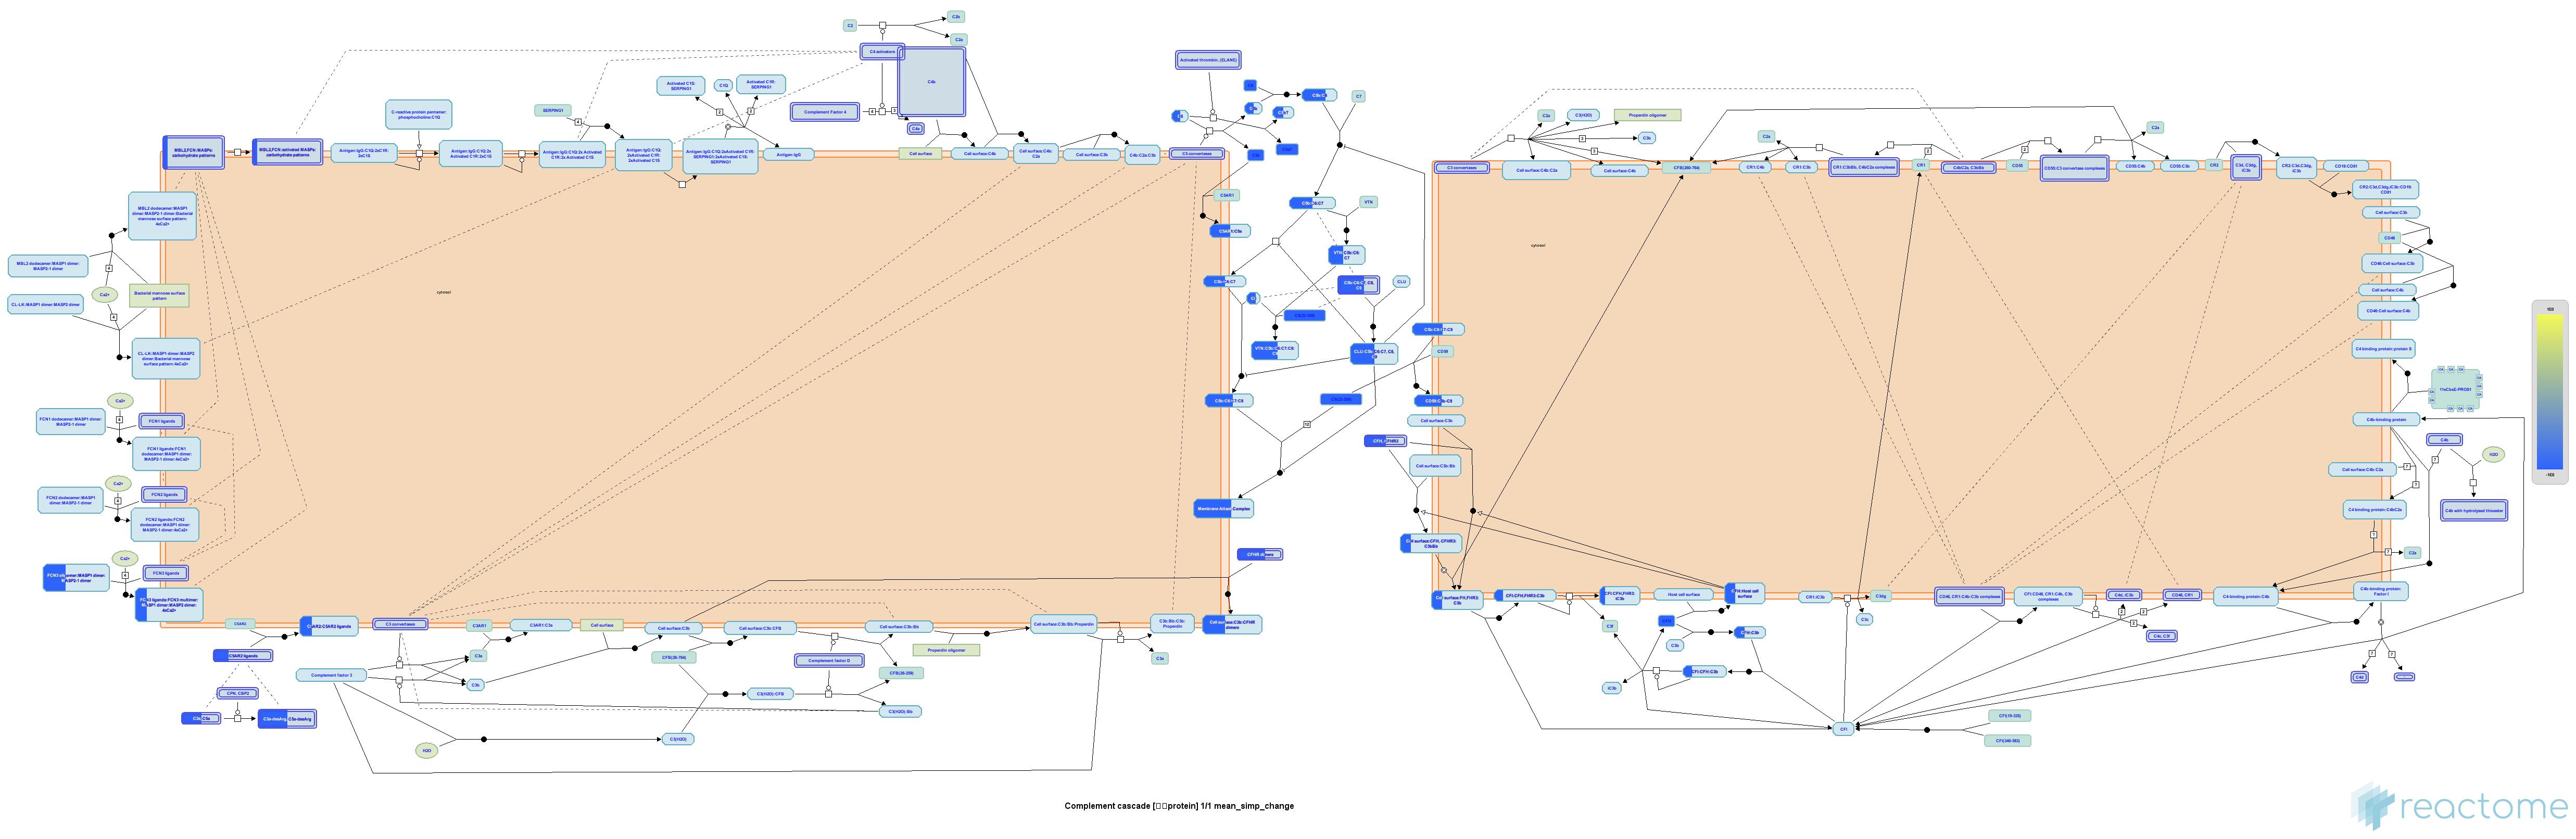

In [7]:
IPython.display.Image(make_reactome_diagram(4))

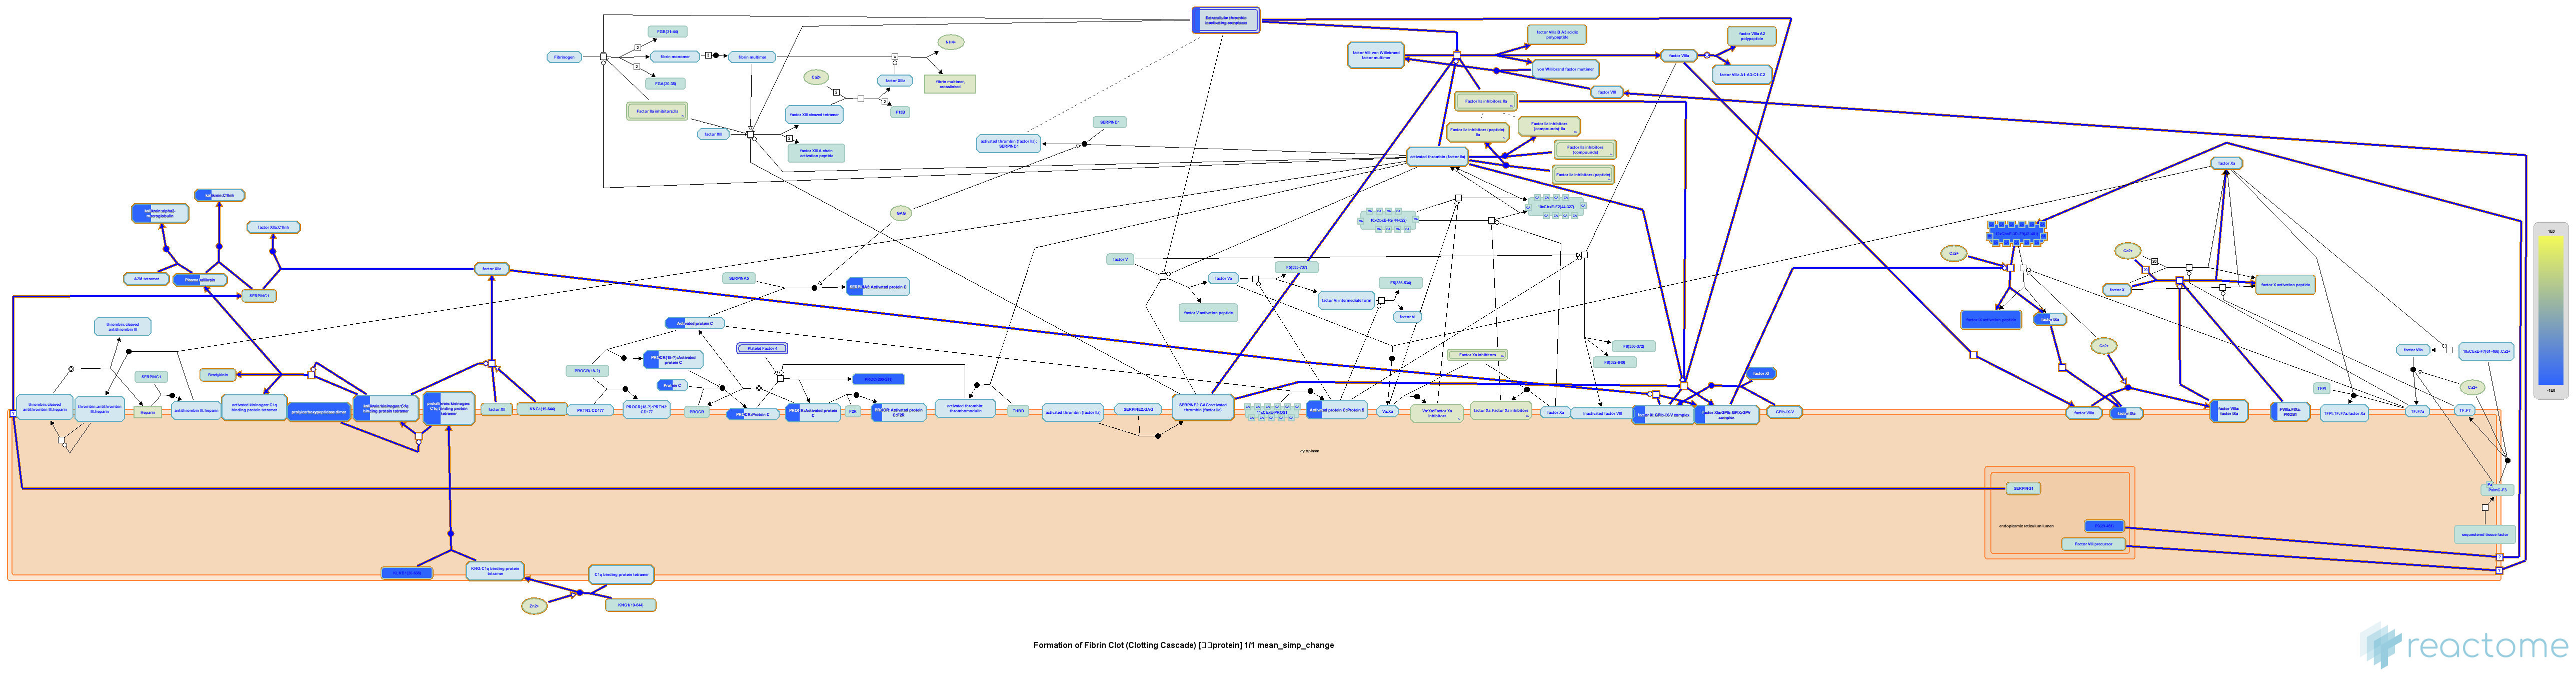

In [8]:
IPython.display.Image(make_reactome_diagram(5))

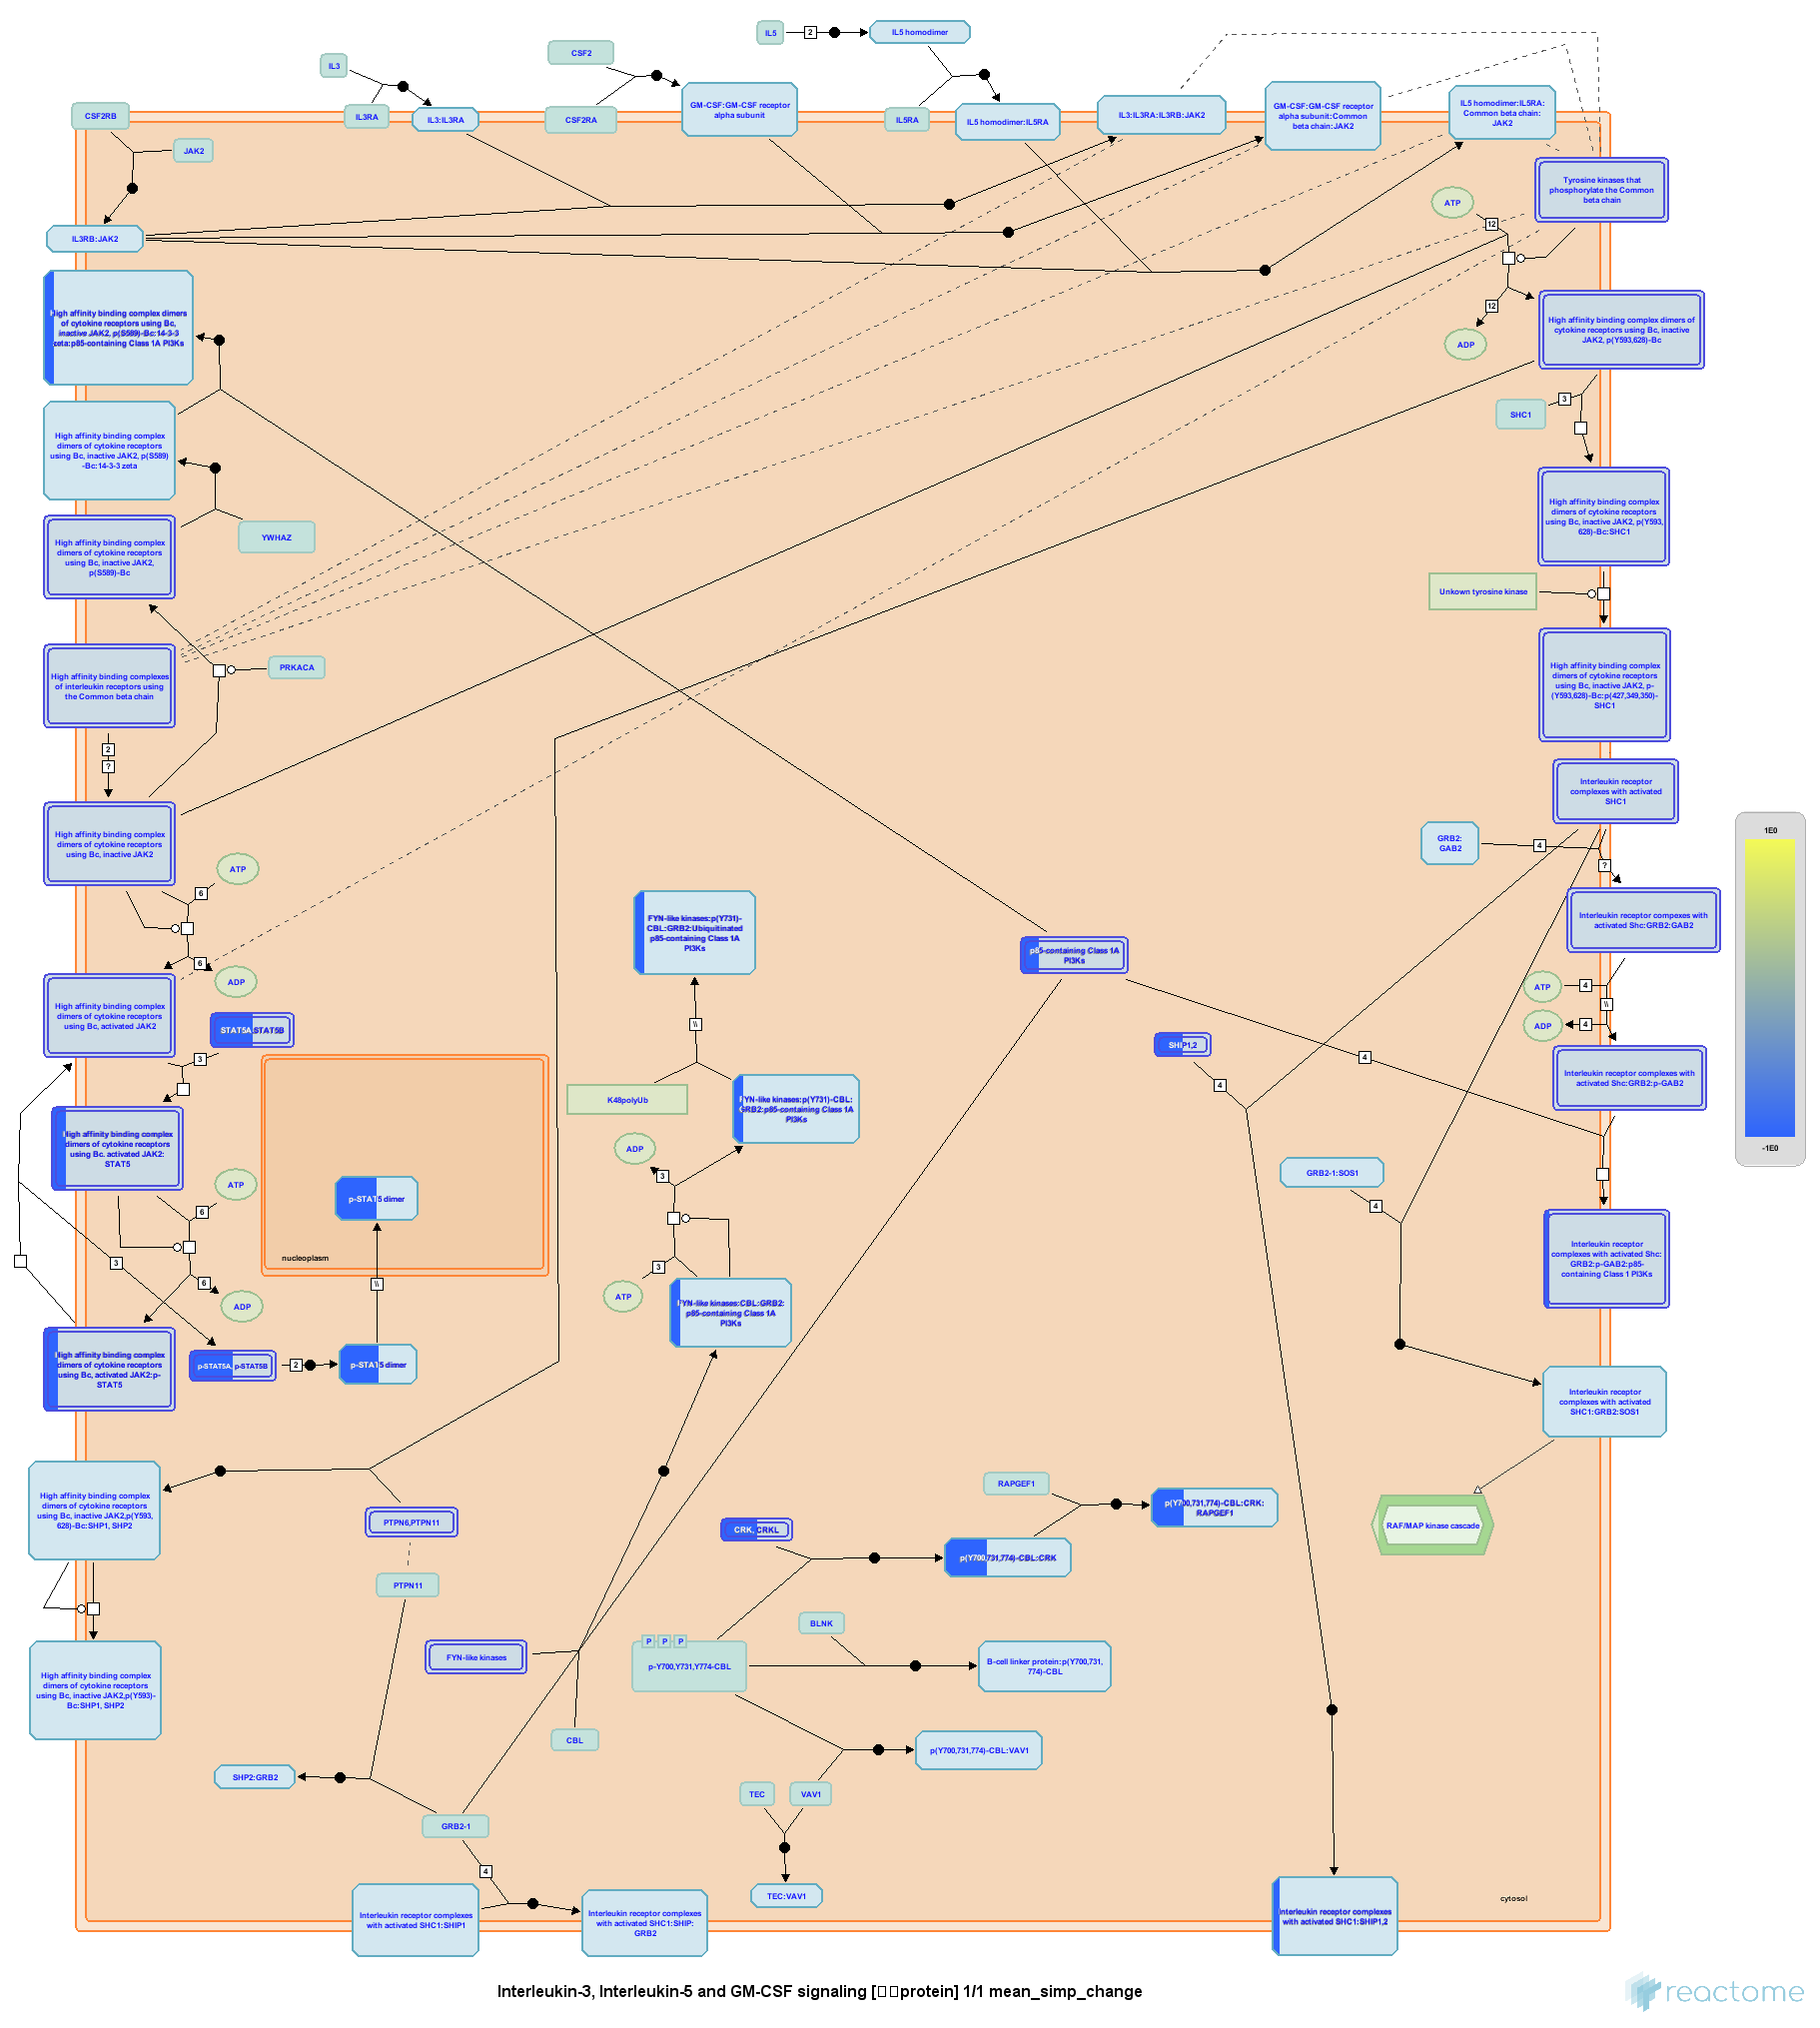

In [9]:
IPython.display.Image(make_reactome_diagram(6))